### QED-C Prototype Benchmarks - Qiskit Version
The notebook contains a suite of prototype application benchmarks for the Qiskit API.
Configure and run the cell below with the desired execution settings.
Then execute the remaining cells, each containing one benchmark program.

In [1]:
min_qubits=4
max_qubits=6
max_circuits=1
num_shots=1000

backend_id="qasm_simulator"
hub="ibm-q"; group="open"; project="main"
provider_backend = None
exec_options = None

# # *** If using IBMQ hardware, run this once to authenticate
# from qiskit import IBMQ
# IBMQ.save_account('YOUR_API_TOKEN_HERE')

# # *** If you are part of an IBMQ group, set hub, group, and project name here
# hub="YOUR_HUB_NAME"
# group="YOUR_GROUP_NAME"
# project="YOUR_PROJECT_NAME"

# # *** This example shows how to specify the backend using a known "backend_id"
# # Use 'sabre' layout for IBM backends
# exec_options = { "optimization_level":3, "layout_method":'sabre', "routing_method":'sabre' }
# backend_id="ibmq_belem"

# # *** Here's an example of using a typical custom provider backend (e.g. AQT simulator)
# import os
# from qiskit_aqt_provider import AQTProvider
# provider = AQTProvider(os.environ.get('AQT_ACCESS_KEY'))    # get your key from environment
# provider_backend = provider.backends.aqt_qasm_simulator_noise_1
# backend_id="aqt_qasm_simulator_noise_1"

# # An example using IonQ provider
# from qiskit_ionq import IonQProvider
# provider = IonQProvider()   # Be sure to set the QISKIT_IONQ_API_TOKEN environment variable
# provider_backend = provider.get_backend("ionq_qpu")
# backend_id="ionq_qpu"


In [2]:
# Custom optimization options can be specified in this cell (below is an example)

# # Example of TrueQ Randomized Compilation
# import _common.transformers.trueq_rc as trueq_rc
# exec_options = { "optimization_level": 3, "layout_method":'sabre', "routing_method":'sabre', "transformer": trueq_rc.local_rc } 

# # Example of pytket Transformer
# import _common.transformers.tket_optimiser as tket_optimiser
# exec_options = { "optimization_level": 0, "layout_method":'sabre', "routing_method":'sabre', "transformer": tket_optimiser.high_optimisation }

# # Define a custom noise model to be used during execution
# import _common.custom.custom_qiskit_noise_model as custom_qiskit_noise_model
# exec_options = { "noise_model": custom_qiskit_noise_model.my_noise_model() }


### Hydrogen Lattice - Method 1

Exception Unrecognised argument(s): encoding occured while configuring logger: bypassing logger config to prevent data loss
Hydrogen Lattice Benchmark Program - Qiskit
... execution starting at Jul 30, 2023 21:26:55 UTC
************
Executing [1] circuits for num_qubits = 4
['C:\\Dropbox\\QCI-TL\\QED-C\\StandardsAndBenchmarks\\github\\themehtaphysical\\qedc_benchmarking\\hydrogen-lattice\\qiskit\\..\\_common\\instances\\h004_chain_000_75.json', 'C:\\Dropbox\\QCI-TL\\QED-C\\StandardsAndBenchmarks\\github\\themehtaphysical\\qedc_benchmarking\\hydrogen-lattice\\qiskit\\..\\_common\\instances\\h004_chain_001_00.json', 'C:\\Dropbox\\QCI-TL\\QED-C\\StandardsAndBenchmarks\\github\\themehtaphysical\\qedc_benchmarking\\hydrogen-lattice\\qiskit\\..\\_common\\instances\\h004_chain_001_25.json']
************
Executing [1] circuits for num_qubits = 6
['C:\\Dropbox\\QCI-TL\\QED-C\\StandardsAndBenchmarks\\github\\themehtaphysical\\qedc_benchmarking\\hydrogen-lattice\\qiskit\\..\\_common\\instances\\h

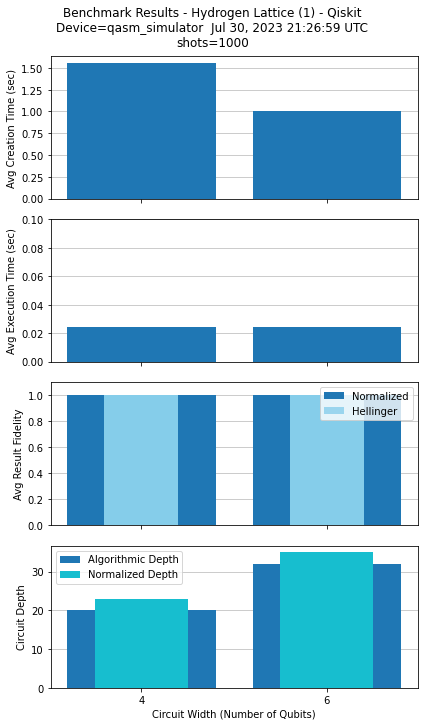

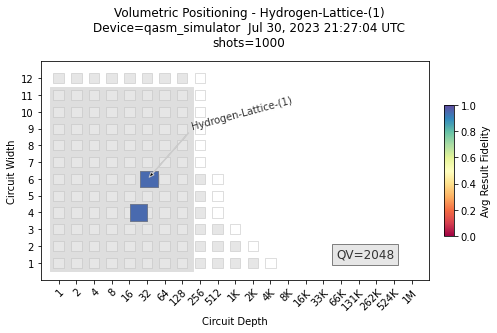

In [3]:
import sys
sys.path.insert(1, "hydrogen-lattice/qiskit")
import hydrogen_lattice_benchmark

# set noise to None for testing
#import execute
#execute.set_noise_model(None)

hydrogen_lattice_benchmark.run(
    min_qubits=min_qubits, max_qubits=max_qubits, max_circuits=max_circuits, num_shots=num_shots,
    method=1, 
    backend_id=backend_id, provider_backend=provider_backend,
    hub=hub, group=group, project=project, exec_options=exec_options
)

### Hydrogen Lattice - Method 2 - Degree 3 - Approximation Ratio as Objective Function

Hydrogen Lattice Benchmark Program - Qiskit
... execution starting at Jul 30, 2023 21:27:10 UTC
************
Executing [1] restarts for num_qubits = 4
['C:\\Dropbox\\QCI-TL\\QED-C\\StandardsAndBenchmarks\\github\\themehtaphysical\\qedc_benchmarking\\hydrogen-lattice\\qiskit\\..\\_common\\instances\\h004_chain_000_75.json', 'C:\\Dropbox\\QCI-TL\\QED-C\\StandardsAndBenchmarks\\github\\themehtaphysical\\qedc_benchmarking\\hydrogen-lattice\\qiskit\\..\\_common\\instances\\h004_chain_001_00.json', 'C:\\Dropbox\\QCI-TL\\QED-C\\StandardsAndBenchmarks\\github\\themehtaphysical\\qedc_benchmarking\\hydrogen-lattice\\qiskit\\..\\_common\\instances\\h004_chain_001_25.json']



C:\ProgramData\Miniconda3\envs\qiskit-test\lib\site-packages\scipy\optimize\_minimize.py:543: RuntimeWarning: Method COBYLA does not support callback.
  warn('Method %s does not support callback.' % method, RuntimeWarning)



...................
Below Energies are for problem file h004_chain_000_75.json is for 4 qubits and radius 0.75 of paired hamiltionians
PUCCD calculated energy : -2.028326066987235

Below Classical Energies are in solution file h004_chain_000_75.sol is 4 qubits and radius 0.75 of paired hamiltionians
DOCI calculated energy : -2.1288045079865525
FCI calculated energy : -2.145110647186226
Close plots to continue


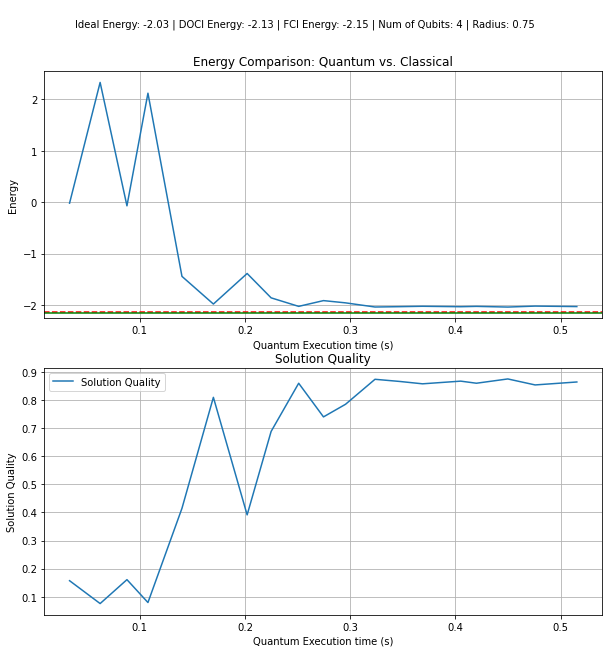

... saving data for width 4 radius None instance_num 1
  ... to file __data\qasm_simulator\width_4_instance_1.json
************
Average Circuit Algorithmic Depth, ξ (xi) for the 4 qubit group = 20, 0.19
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 4 qubit group = 23, 0.148, 8.0
Average Creation, Elapsed, Execution Time for the 4 qubit group = 0.074, 0.681, 0.04 secs
Average Transpiling, Validating, Running Times for group 4 = 0.001, 0.001, 0.001 secs
Average Hellinger, Normalized Fidelity for the 4 qubit group = 0.0, 0.0

************
Executing [1] restarts for num_qubits = 6
['C:\\Dropbox\\QCI-TL\\QED-C\\StandardsAndBenchmarks\\github\\themehtaphysical\\qedc_benchmarking\\hydrogen-lattice\\qiskit\\..\\_common\\instances\\h006_chain_000_75.json', 'C:\\Dropbox\\QCI-TL\\QED-C\\StandardsAndBenchmarks\\github\\themehtaphysical\\qedc_benchmarking\\hydrogen-lattice\\qiskit\\..\\_common\\instances\\h006_chain_001_00.json', 'C:\\Dropbox\\QCI-TL\\QED-C\\StandardsAndBenchmarks\\

C:\ProgramData\Miniconda3\envs\qiskit-test\lib\site-packages\scipy\optimize\_minimize.py:543: RuntimeWarning: Method COBYLA does not support callback.
  warn('Method %s does not support callback.' % method, RuntimeWarning)



................
Below Energies are for problem file h006_chain_000_75.json is for 6 qubits and radius 0.75 of paired hamiltionians
PUCCD calculated energy : -2.9429635445769113

Below Classical Energies are in solution file h006_chain_000_75.sol is 6 qubits and radius 0.75 of paired hamiltionians
DOCI calculated energy : -3.1190941516390347
FCI calculated energy : -3.1553048004765425
Close plots to continue


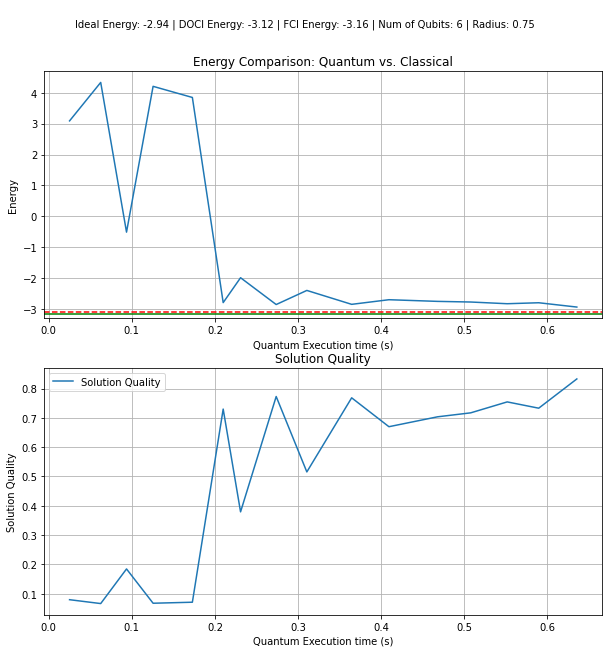

... saving data for width 6 radius None instance_num 1
  ... to file __data\qasm_simulator\width_6_instance_1.json
************
Average Circuit Algorithmic Depth, ξ (xi) for the 6 qubit group = 32, 0.194
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 6 qubit group = 35, 0.162, 18.0
Average Creation, Elapsed, Execution Time for the 6 qubit group = 0.159, 1.29, 0.046 secs
Average Transpiling, Validating, Running Times for group 6 = 0.001, 0.001, 0.001 secs
Average Hellinger, Normalized Fidelity for the 6 qubit group = 0.0, 0.0

... execution complete at Jul 30, 2023 21:27:45 UTC in 34.712 secs



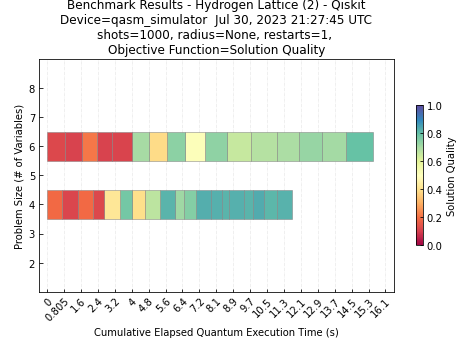

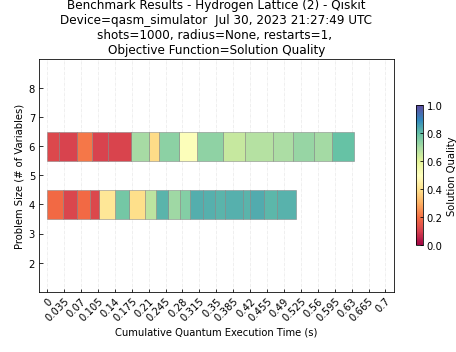

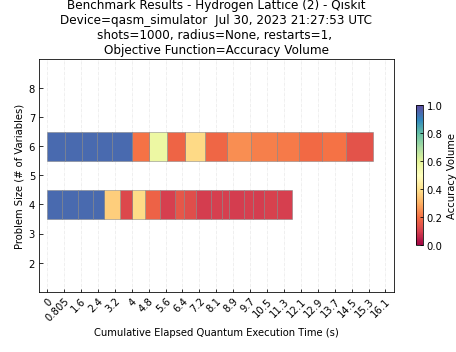

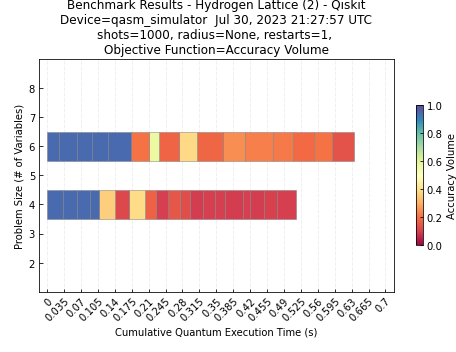

In [4]:
import sys
sys.path.insert(1, "hydrogen-lattice/qiskit")
import hydrogen_lattice_benchmark

# set noise to None for testing
# import execute
# execute.set_noise_model(None)

# execute and display options
objective_func_type = 'solution_quality'
score_metric=['solution_quality', 'accuracy_volume']
x_metric=['cumulative_elapsed_time', 'cumulative_exec_time']

# Note: the plots produced by this benchmark only use the last of the problems at each width

hydrogen_lattice_benchmark.run(
    min_qubits=min_qubits, max_qubits=max_qubits, max_circuits=max_circuits, num_shots=num_shots,
    method=2, radius=None, do_fidelities=False, parameterized=False, max_iter=30,
    score_metric=score_metric, x_metric=x_metric, save_res_to_file=True, comfort=True,
    backend_id=backend_id, provider_backend=provider_backend,
    hub=hub, group=group, project=project, exec_options=exec_options
)

### Load Data From File and Regenerate Plots
This cell can be used to re-load the data stored during benchmark execution and plot the results.

Be sure to first execute the initial cell which sets the backend_id

... execution starting at Jul 30, 2023 21:28:07 UTC
['width_4_instance_1.json', 'width_6_instance_1.json']
<re.Match object; span=(0, 23), match='width_4_instance_1.json'>
<re.Match object; span=(0, 23), match='width_6_instance_1.json'>
<re.Match object; span=(0, 23), match='width_4_instance_1.json'>
Loading from width_4_instance_1.json, corresponding to 4 qubits and restart index 1
<re.Match object; span=(0, 23), match='width_4_instance_1.json'>
************
Average Circuit Algorithmic Depth, ξ (xi) for the 4 qubit group = 20, 0.19
Average Normalized Transpiled Depth, ξ (xi), 2q gates for the 4 qubit group = 23, 0.148, 8.0
Average Creation, Elapsed, Execution Time for the 4 qubit group = 0.074, 0.681, 0.04 secs
Average Transpiling, Validating, Running Times for group 4 = 0.001, 0.001, 0.001 secs
Average Hellinger, Normalized Fidelity for the 4 qubit group = 0.0, 0.0

<re.Match object; span=(0, 23), match='width_6_instance_1.json'>
Loading from width_6_instance_1.json, corresponding to

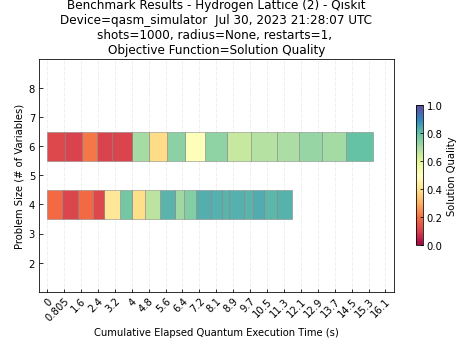

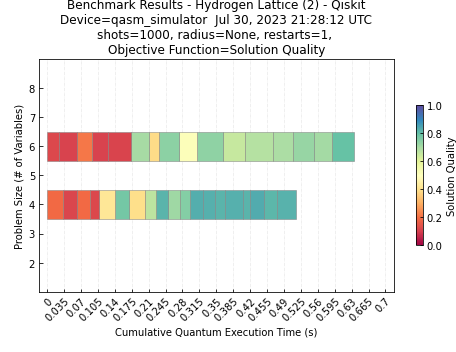

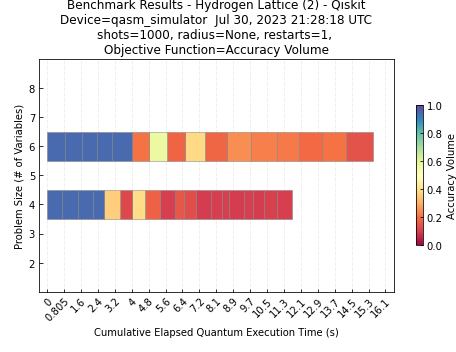

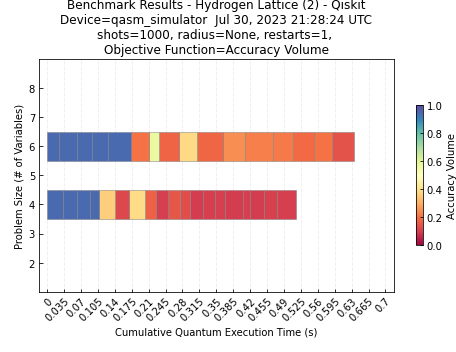

In [5]:
import os, hydrogen_lattice_benchmark
backend_id = "qasm_simulator"

hydrogen_lattice_benchmark.load_data_and_plot(os.path.join('__data', backend_id, ''),                                             
                #objective_func_type = 'solution_quality',
                score_metric=['solution_quality', 'accuracy_volume'],
                x_metric=['cumulative_elapsed_time', 'cumulative_exec_time'])

In [6]:
import qiskit
qiskit.__qiskit_version__


{'qiskit-terra': '0.24.1', 'qiskit-aer': '0.12.0', 'qiskit-ignis': '0.7.1', 'qiskit-ibmq-provider': '0.20.2', 'qiskit': '0.43.1', 'qiskit-nature': '0.4.1', 'qiskit-finance': None, 'qiskit-optimization': None, 'qiskit-machine-learning': None}